In [16]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [17]:
dire = r"C:\Users\randy\EBAC.PRACTICAS\Bases.docs\wine-clustering.csv"
df_wine = pd.read_csv(dire)
df_wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [18]:
# Vino objetivo (características del vino a comparar)
vino_objetivo = {
    'Malic_Acid': 2,
    'Ash': 2.5,
    'Ash_Alcanity': 16,
    'Magnesium': 115,
    'Total_Phenols': 3,
    'Flavanoids': 2.5,
    'Nonflavanoid_Phenols': 0.4,
    'Proanthocyanins': 2,
    'Color_Intensity': 9,
    'Hue': 1,
    'OD280': 3.5,
    'Proline': 800
}

In [19]:
# Convertir el vino objetivo a un array con las mismas características
caracteristicas = ['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 
                   'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 
                   'Color_Intensity', 'Hue', 'OD280', 'Proline']


In [20]:
# Extraer las características del dataset (sin la columna Alcohol)
X = df_wine[caracteristicas]


In [29]:
X

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...
173,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [21]:
# Crear el array del vino objetivo
vino_objetivo_array = np.array([[vino_objetivo[feat] for feat in caracteristicas]])

In [22]:
# Aplicar KNN con k=5
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(X)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"radius radius: float, default=1.0Range of parameter space to use by default for :meth:`radius_neighbors`queries.",1.0
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'euclidean'
,"p p: float (positive), default=2Parameter for the Minkowski metric fromsklearn.metrics.pairwise.pairwise_distances. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [23]:
# Encontrar los 5 vecinos más cercanos
distancias, indices = knn.kneighbors(vino_objetivo_array)

In [24]:
# Obtener los 5 vinos más cercanos
vinos_cercanos = df_wine.iloc[indices[0]]

In [25]:
# Mostrar resultados
print("=" * 80)
print("VINO OBJETIVO:")
print("=" * 80)
for feat, valor in vino_objetivo.items():
    print(f"{feat}: {valor}")

VINO OBJETIVO:
Malic_Acid: 2
Ash: 2.5
Ash_Alcanity: 16
Magnesium: 115
Total_Phenols: 3
Flavanoids: 2.5
Nonflavanoid_Phenols: 0.4
Proanthocyanins: 2
Color_Intensity: 9
Hue: 1
OD280: 3.5
Proline: 800


In [ ]:
print("\n" + "=" * 80)
print("LOS 5 VINOS MÁS CERCANOS:")
print("=" * 80)
print(vinos_cercanos)


LOS 5 VINOS MÁS CERCANOS:
     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
40     13.56        1.71  2.31          16.2        117           3.15   
20     14.06        1.63  2.28          16.0        126           3.00   
25     13.05        2.05  3.22          25.0        124           2.63   
21     12.93        3.80  2.65          18.6        102           2.41   
141    13.36        2.56  2.35          20.0         89           1.40   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
40         3.29                  0.34             2.34             6.13  0.95   
20         3.17                  0.24             2.10             5.65  1.09   
25         2.68                  0.47             1.92             3.58  1.13   
21         2.41                  0.25             1.98             4.50  1.03   
141        0.50                  0.37             0.64             5.60  0.70   

     OD280  Proline  
40    3.38      795

In [45]:
vinos_cercanos

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
40,13.56,1.71,2.31,16.2,117,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795
20,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
21,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770
141,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780


In [27]:
print("\n" + "=" * 80)
print("DISTANCIAS A CADA VECINO:")
print("=" * 80)
for i, (idx, dist) in enumerate(zip(indices[0], distancias[0]), 1):
    print(f"Vecino {i} (índice {idx}): Distancia = {dist:.2f}, Alcohol = {df_wine.iloc[idx]['Alcohol']:.2f}")



DISTANCIAS A CADA VECINO:
Vecino 1 (índice 40): Distancia = 6.18, Alcohol = 13.56
Vecino 2 (índice 20): Distancia = 23.09, Alcohol = 14.06
Vecino 3 (índice 25): Distancia = 33.05, Alcohol = 13.05
Vecino 4 (índice 21): Distancia = 33.16, Alcohol = 12.93
Vecino 5 (índice 141): Distancia = 33.37, Alcohol = 13.36


In [14]:
print("\n" + "=" * 80)
print("RESULTADO FINAL:")
print("=" * 80)
promedio_alcohol = vinos_cercanos['Alcohol'].mean()
print(f"Promedio de Alcohol de los 5 vecinos más cercanos: {promedio_alcohol:.2f}")
print("=" * 80)


RESULTADO FINAL:
Promedio de Alcohol de los 5 vecinos más cercanos: 13.39


## Resultados del algoritmo KNN
Como podemos observar en la siguiente imagen, los 5 vecinos más cercanos son

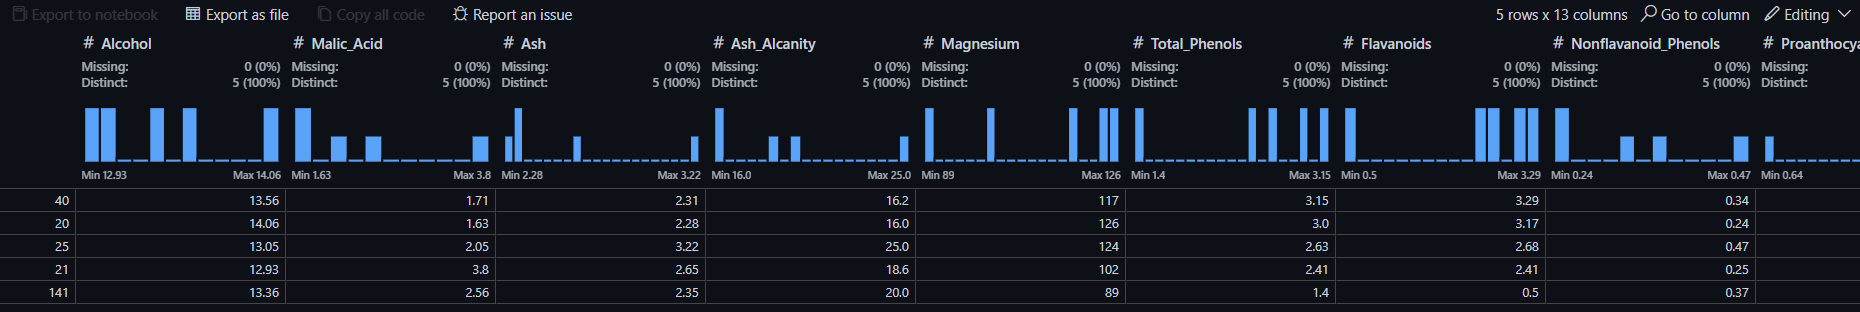

# MARKET BASKET ANALYSIS

In [34]:
my_basket = [['bread', 'butter', 'wine', 'bananas', 'coffee', 'carrots'],
    ['tomatoes', 'onions', 'cheese', 'milk', 'potatoes'],
    ['beer', 'chips', 'asparagus', 'salsa', 'milk', 'apples'],
    ['olive oil', 'bread', 'butter', 'tomatoes', 'steak', 'carrots'],
    ['tomatoes', 'onions', 'chips', 'wine', 'ketchup', 'orange juice'],
    ['bread', 'butter', 'beer', 'chips', 'milk'],
    ['butter', 'tomatoes', 'carrots', 'coffee', 'sugar'],
    ['tomatoes', 'onions', 'cheese', 'milk', 'potatoes'],
    ['bread', 'butter', 'ketchup', 'coffee', 'chicken wings'],
    ['butter', 'beer', 'chips', 'asparagus', 'apples'],
    ['tomatoes', 'onion', 'beer', 'chips', 'milk', 'coffee']]

In [35]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [36]:
# Paso 1: Codificar las transacciones en formato binario (one-hot encoding)
te = TransactionEncoder()
te_array = te.fit(my_basket).transform(my_basket)
df_basket = pd.DataFrame(te_array, columns=te.columns_)

In [37]:
print("\n1. MATRIZ DE TRANSACCIONES (One-Hot Encoding):")
print("-" * 80)
print(df_basket)
print(f"\nTotal de transacciones: {len(df_basket)}")
print(f"Total de productos únicos: {len(df_basket.columns)}")


1. MATRIZ DE TRANSACCIONES (One-Hot Encoding):
--------------------------------------------------------------------------------
    apples  asparagus  bananas   beer  bread  butter  carrots  cheese  \
0    False      False     True  False   True    True     True   False   
1    False      False    False  False  False   False    False    True   
2     True       True    False   True  False   False    False   False   
3    False      False    False  False   True    True     True   False   
4    False      False    False  False  False   False    False   False   
5    False      False    False   True   True    True    False   False   
6    False      False    False  False  False    True     True   False   
7    False      False    False  False  False   False    False    True   
8    False      False    False  False   True    True    False   False   
9     True       True    False   True  False    True    False   False   
10   False      False    False   True  False   False    False   Fals

In [38]:
# Paso 2: Encontrar conjuntos frecuentes (Frequent Itemsets)
# min_support = 0.2 significa que el producto/combinación debe aparecer en al menos 20% de las transacciones
frequent_itemsets = apriori(df_basket, min_support=0.2, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets = frequent_itemsets.sort_values('support', ascending=False)

In [39]:
print("\n2. CONJUNTOS FRECUENTES (Productos que aparecen juntos frecuentemente):")
print("-" * 80)
print(frequent_itemsets)


2. CONJUNTOS FRECUENTES (Productos que aparecen juntos frecuentemente):
--------------------------------------------------------------------------------
     support             itemsets  length
8   0.545455           (tomatoes)       1
2   0.545455             (butter)       1
6   0.454545               (milk)       1
4   0.454545              (chips)       1
1   0.363636              (bread)       1
0   0.363636               (beer)       1
9   0.363636        (chips, beer)       2
5   0.363636             (coffee)       1
11  0.363636      (butter, bread)       2
3   0.272727            (carrots)       1
7   0.272727             (onions)       1
10  0.272727         (milk, beer)       2
12  0.272727    (carrots, butter)       2
13  0.272727     (butter, coffee)       2
14  0.272727        (chips, milk)       2
15  0.272727     (tomatoes, milk)       2
16  0.272727   (onions, tomatoes)       2
17  0.272727  (milk, chips, beer)       3


In [40]:
# Mostrar los itemsets más frecuentes
print("\n3. TOP 10 PRODUCTOS/COMBINACIONES MÁS FRECUENTES:")
print("-" * 80)
top_itemsets = frequent_itemsets.head(10)
for idx, row in top_itemsets.iterrows():
    productos = ', '.join(list(row['itemsets']))
    porcentaje = row['support'] * 100
    print(f"• {productos}: {porcentaje:.1f}% de las transacciones")


3. TOP 10 PRODUCTOS/COMBINACIONES MÁS FRECUENTES:
--------------------------------------------------------------------------------
• tomatoes: 54.5% de las transacciones
• butter: 54.5% de las transacciones
• milk: 45.5% de las transacciones
• chips: 45.5% de las transacciones
• bread: 36.4% de las transacciones
• beer: 36.4% de las transacciones
• chips, beer: 36.4% de las transacciones
• coffee: 36.4% de las transacciones
• butter, bread: 36.4% de las transacciones
• carrots: 27.3% de las transacciones


## Análisis de Market Basket
En esta captura se observan las reglas de asociación...

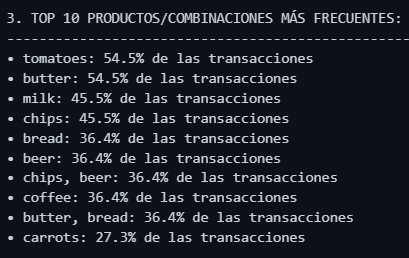

In [41]:
# Métricas:
# - confidence: probabilidad de comprar Y dado que se compró X
# - lift: qué tan más probable es comprar Y cuando se compra X (>1 = relación positiva)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules = rules.sort_values('lift', ascending=False)

In [42]:
print("\n4. REGLAS DE ASOCIACIÓN (Patrones de Consumo):")
print("-" * 80)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

print("\n5. INTERPRETACIÓN DE LAS REGLAS MÁS IMPORTANTES:")
print("-" * 80)
top_rules = rules.head(10)
for idx, row in top_rules.iterrows():
    antecedente = ', '.join(list(row['antecedents']))
    consecuente = ', '.join(list(row['consequents']))
    confianza = row['confidence'] * 100
    lift = row['lift']
    print(f"\nRegla: Si compra [{antecedente}] → entonces compra [{consecuente}]")
    print(f"  - Confianza: {confianza:.1f}% (probabilidad de que se cumpla)")
    print(f"  - Lift: {lift:.2f} ({'fuerte' if lift > 2 else 'moderada' if lift > 1.5 else 'débil'} asociación)")



4. REGLAS DE ASOCIACIÓN (Patrones de Consumo):
--------------------------------------------------------------------------------
      antecedents    consequents   support  confidence      lift
19         (beer)  (chips, milk)  0.272727    0.750000  2.750000
18  (chips, milk)         (beer)  0.272727    1.000000  2.750000
17   (milk, beer)        (chips)  0.272727    1.000000  2.200000
20        (chips)   (milk, beer)  0.272727    0.600000  2.200000
0         (chips)         (beer)  0.363636    0.800000  2.200000
1          (beer)        (chips)  0.363636    1.000000  2.200000
6       (carrots)       (butter)  0.272727    1.000000  1.833333
7        (butter)      (carrots)  0.272727    0.500000  1.833333
3         (bread)       (butter)  0.363636    1.000000  1.833333
2        (butter)        (bread)  0.363636    0.666667  1.833333
15     (tomatoes)       (onions)  0.272727    0.500000  1.833333
14       (onions)     (tomatoes)  0.272727    1.000000  1.833333
5          (milk)         

In [43]:
# Análisis adicional: Productos individuales más comprados
print("\n6. PRODUCTOS INDIVIDUALES MÁS COMPRADOS:")
print("-" * 80)
productos_individuales = frequent_itemsets[frequent_itemsets['length'] == 1].sort_values('support', ascending=False)
for idx, row in productos_individuales.iterrows():
    producto = list(row['itemsets'])[0]
    porcentaje = row['support'] * 100
    veces = int(row['support'] * len(my_basket))
    print(f"• {producto}: aparece en {veces} de {len(my_basket)} transacciones ({porcentaje:.1f}%)")



6. PRODUCTOS INDIVIDUALES MÁS COMPRADOS:
--------------------------------------------------------------------------------
• tomatoes: aparece en 6 de 11 transacciones (54.5%)
• butter: aparece en 6 de 11 transacciones (54.5%)
• milk: aparece en 5 de 11 transacciones (45.5%)
• chips: aparece en 5 de 11 transacciones (45.5%)
• bread: aparece en 4 de 11 transacciones (36.4%)
• beer: aparece en 4 de 11 transacciones (36.4%)
• coffee: aparece en 4 de 11 transacciones (36.4%)
• carrots: aparece en 3 de 11 transacciones (27.3%)
• onions: aparece en 3 de 11 transacciones (27.3%)


In [44]:
print("\n" + "=" * 80)
print("RECOMENDACIONES BASADAS EN EL ANÁLISIS:")
print("=" * 80)
print("1. Colocar productos con alto lift juntos en los estantes")
print("2. Crear promociones combinadas de productos frecuentemente comprados juntos")
print("3. Usar las reglas de asociación para sistemas de recomendación")


RECOMENDACIONES BASADAS EN EL ANÁLISIS:
1. Colocar productos con alto lift juntos en los estantes
2. Crear promociones combinadas de productos frecuentemente comprados juntos
3. Usar las reglas de asociación para sistemas de recomendación


Las reglas más importantes indican que...

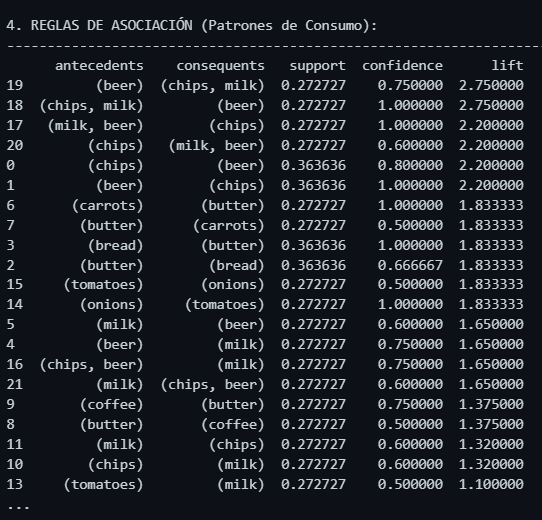